# This is called... WOW 😲
This will be like 🤯

Why? What happened? <br>
Here we will talk about the ***extrapolation***.

Don't be scared of that term. That simply means: *calculating value outside of what is learn't*.

### 👻 The reason 
In one of the lectures, the author explains "why ML models can't extrapolate" and here it relates with our case of using the ML models in forecasting the time-series. In the time-series what we are doing is, ***estimating upcoming values in the time-series which has not yet come*** which exactly is the extrapolation.

The model which has learnt through the training data, does a good job in when the same situation is given to it, but **when the new situation comes *(although similar)* they have to extrapolate**.

If I can give an example to you for this:

<img src="../images/extrapolation.png" height=300 width=400>

The green area is for the model to predict. If it captures the pattern correctly, then we would consider it as a useful otherwise not.

Here we will do a little **acid-test** for the model. And will see do they really perform such task?

## 🧪 Acid Test 

In [1]:
# the usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (20, 10)

# the ml imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

- So, first we will create the data and will visualize it. 
- The data will be created with the **known** formulae. 
- So, we will test how the model captures the pattern.

# $$y = cos(X)$$

Our function of `y` is the given above.

In [2]:
# generating the data
n_samples = 1000
X = np.linspace(-10, 10, n_samples)
y = np.cos(X)

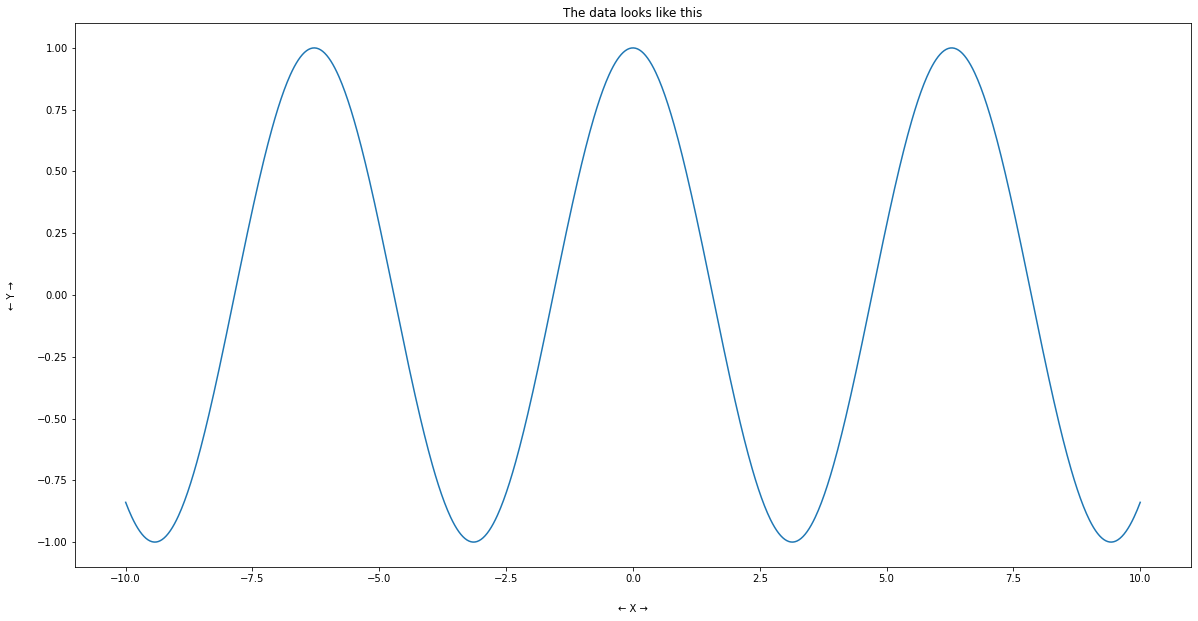

In [3]:
plt.plot(X, y)
plt.title("The data looks like this")
plt.xlabel("← X →", labelpad=20)
plt.ylabel("← Y →", labelpad=20);

We will only give the data which is between `-10 — 10` so, the model will get to learn that only.

In [4]:
def plot_and_compare(prediction, title):
    plt.plot(y, label="True values")
    plt.plot(prediction, ls="dashed", label="Predicted values")
    plt.title(title)
    plt.xlabel("← X →", labelpad=20)
    plt.ylabel("← Y →", labelpad=20)
    plt.legend();

#### `1.` SVM

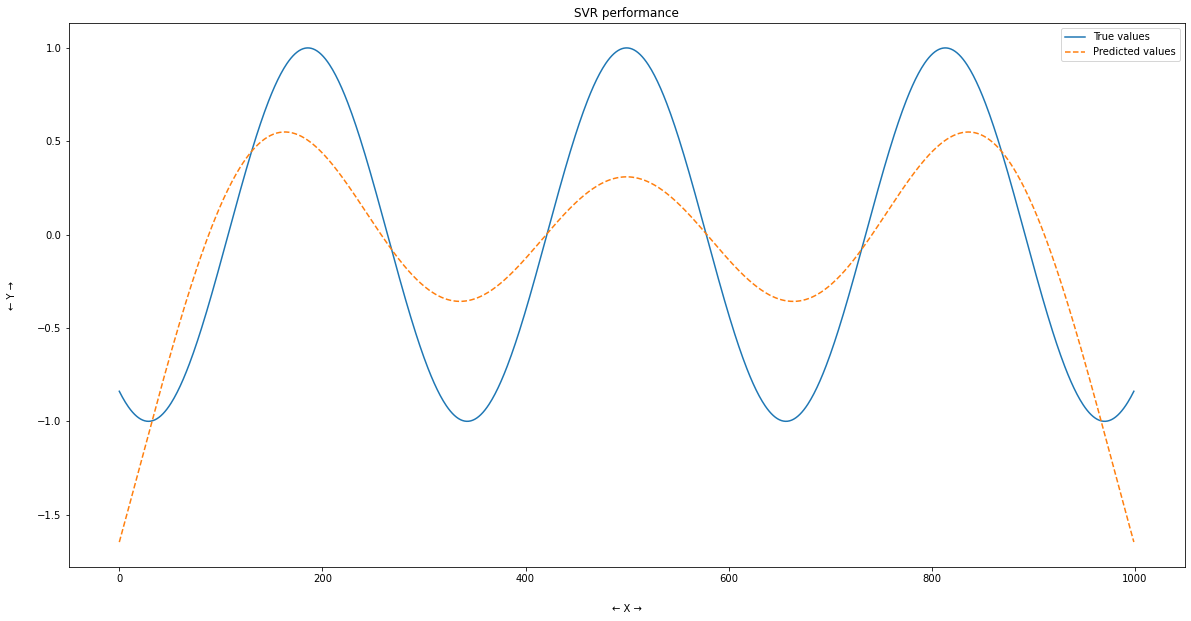

In [5]:
svr = SVR().fit(X[:, np.newaxis], y)
svr_preds_inSample = svr.predict(X[:, np.newaxis])
plot_and_compare(svr_preds_inSample, "SVR performance")

As we can see, the SVR has dones **not bad** category job in predicting the **in-sample** data. Of course we can tweak its `C` hyperparameter and make it more ***fit*** on the data like...

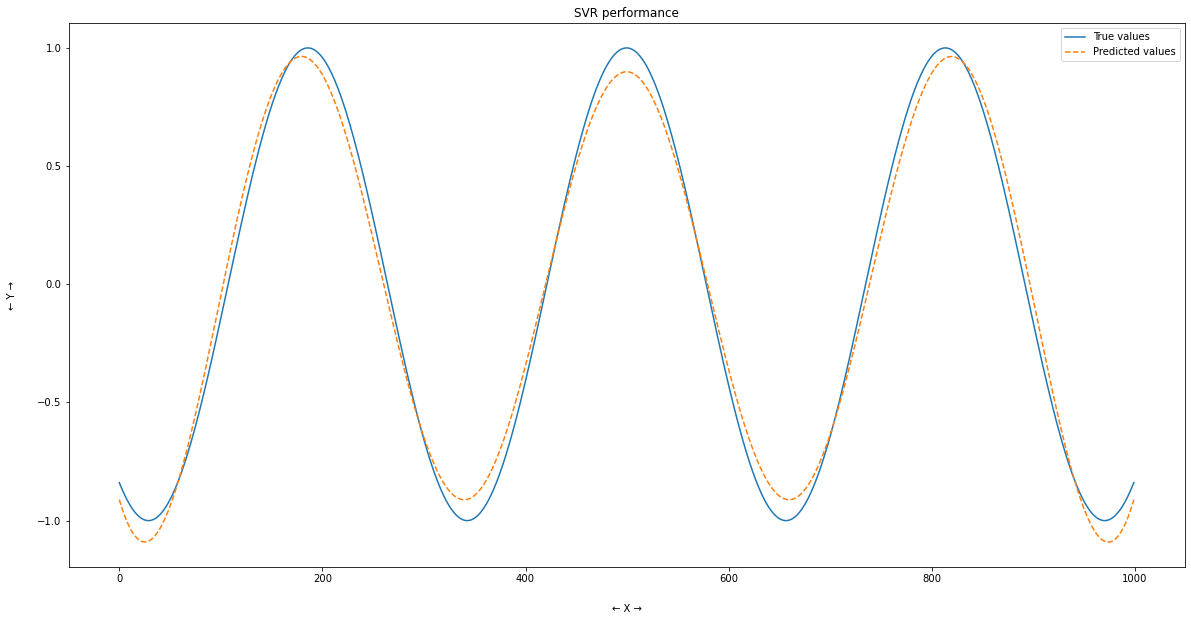

In [6]:
svr = SVR(C=100).fit(X[:, np.newaxis], y)
svr_preds_inSample = svr.predict(X[:, np.newaxis])
plot_and_compare(svr_preds_inSample, "SVR performance")

Much better! So, now we will be using that.

So, how does it perform on the **unseen data**?

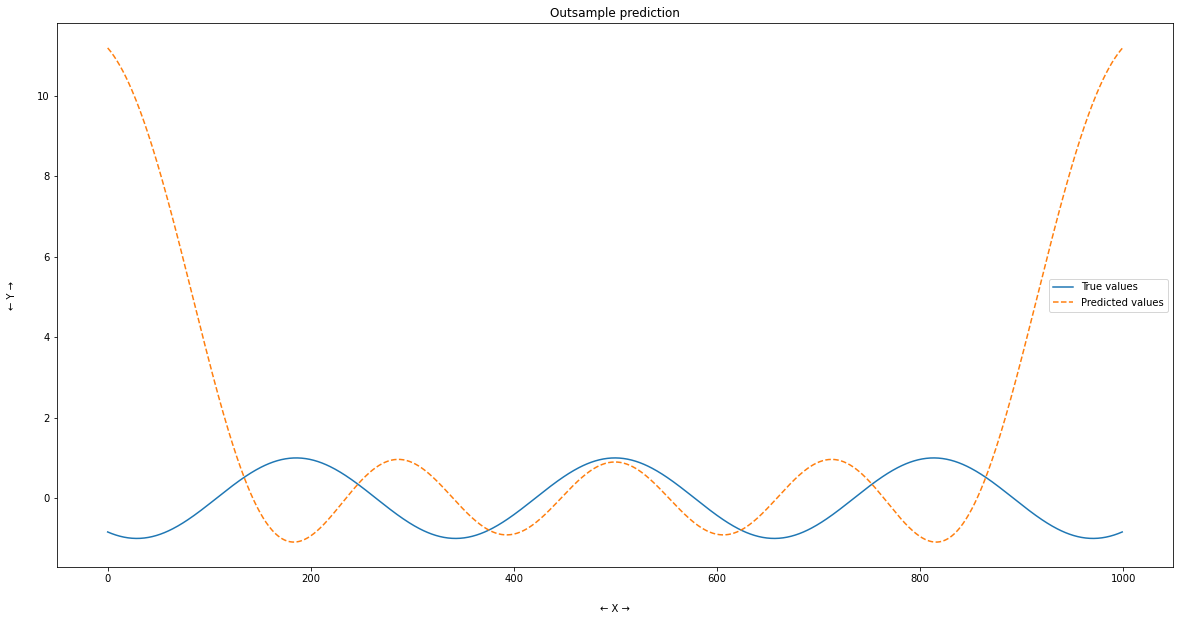

In [7]:
unseen_data = np.linspace(-15, 15, 1000)
svr_preds_outSample = svr.predict(unseen_data[:, np.newaxis])
plot_and_compare(svr_preds_outSample, "Outsample prediction")

Oh... so SVR is not able to learn the given function. It simply doesn't work.

> ### Hence,  **NO** for SVR ❌

##### 

#### `2.` Random Forest

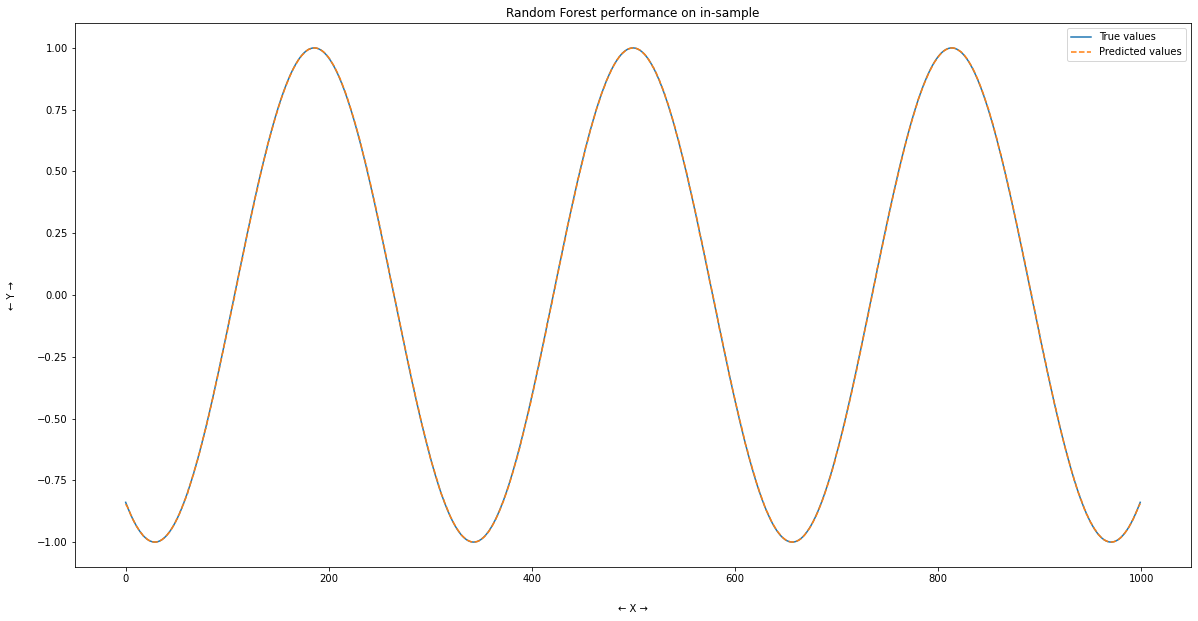

In [8]:
rf = RandomForestRegressor().fit(X[:, np.newaxis], y)
rf_preds_inSample = rf.predict(X[:, np.newaxis])
plot_and_compare(rf_preds_inSample, "Random Forest performance on in-sample")

Amazing. Of-course the overfitting. <br>
So, how does it perform on the **unseen data**?

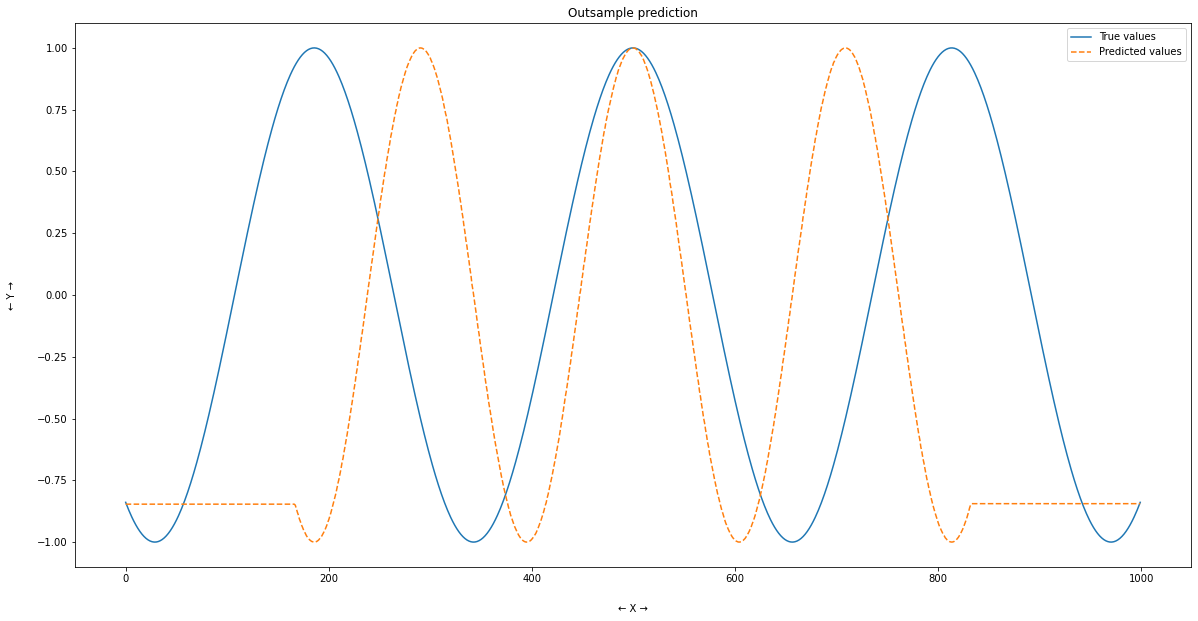

In [9]:
unseen_data = np.linspace(-15, 15, 1000)
rf_preds_outSample = rf.predict(unseen_data[:, np.newaxis])
plot_and_compare(rf_preds_outSample, "Outsample prediction")

Ahh! I knew that! <br>
Random Forest uses the trees inside and the trees stores the data in the leaves. So when the prediction happens they use the mean. Thus, no new data is generated outside of the training instances!

> ### Hence, **NO** for RF ❌

##### 

#### `3.` KNN

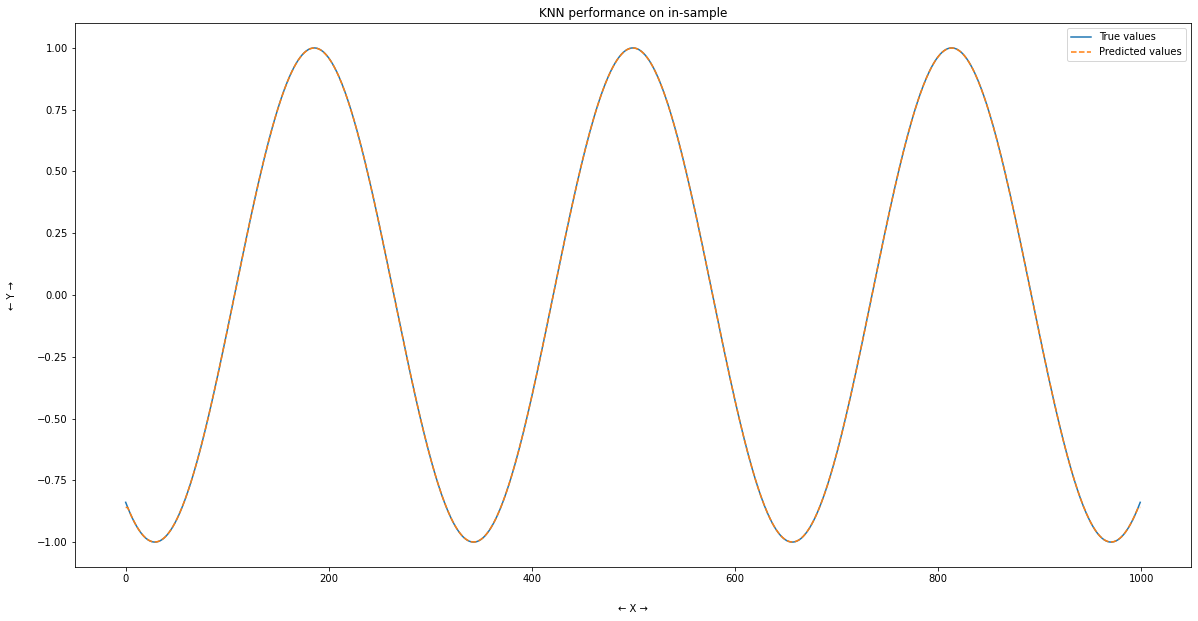

In [10]:
KNN = KNeighborsRegressor().fit(X[:, np.newaxis], y)
KNN_preds_inSample = KNN.predict(X[:, np.newaxis])
plot_and_compare(KNN_preds_inSample, "KNN performance on in-sample")

Aah! Good... I don't know what to say.

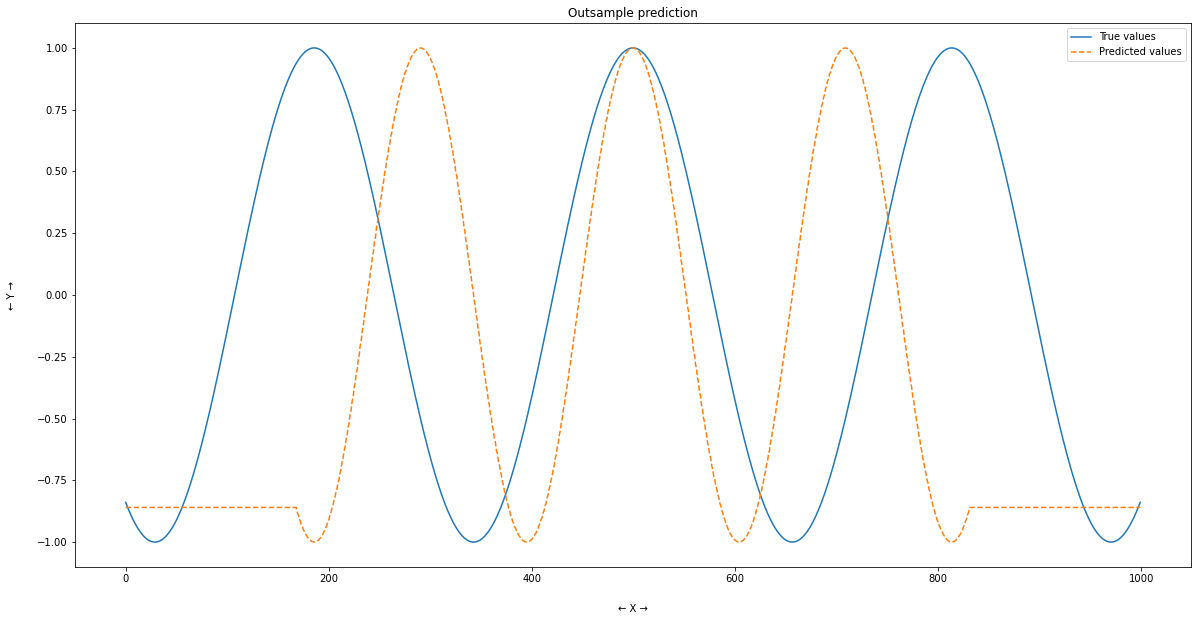

In [11]:
unseen_data = np.linspace(-15, 15, 1000)
KNN_preds_outSample = KNN.predict(unseen_data[:, np.newaxis])
plot_and_compare(KNN_preds_outSample, "Outsample prediction")

Not expected like this, but it seems a brother of Ranom Forest here. Let's see whether they both give the same result or not.

In [12]:
np.allclose(KNN_preds_outSample, rf_preds_outSample)

False

Good.

> ### Hence, **NO** for KNN ❌

##### 

#### `4.` Neural Network?

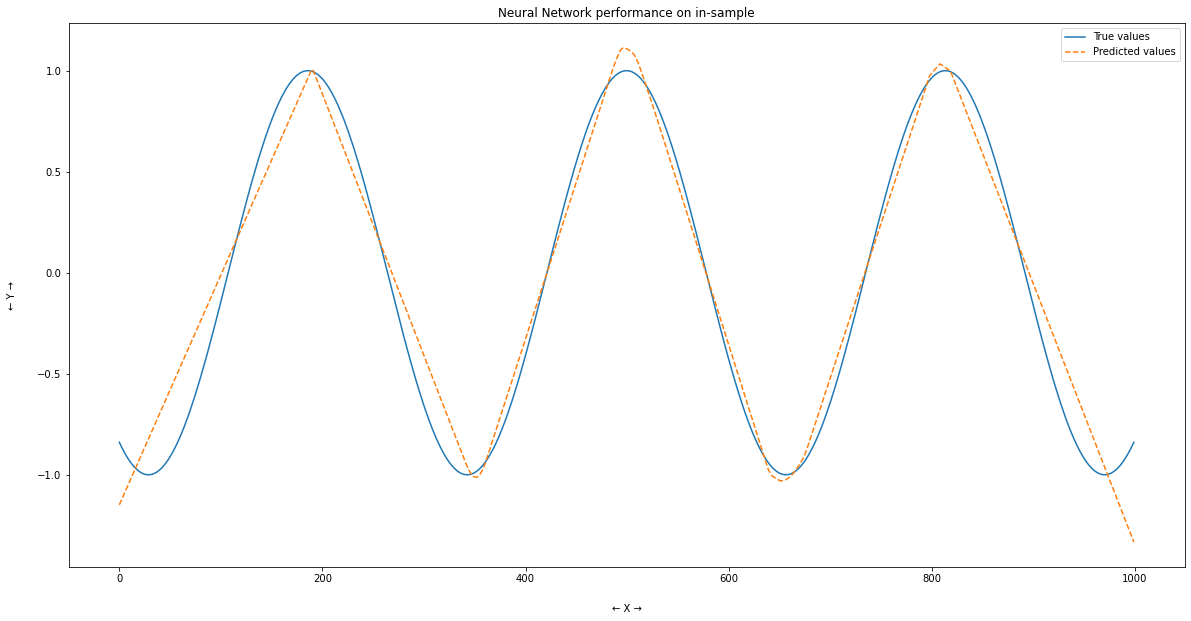

In [13]:
NN = MLPRegressor(max_iter=1000, random_state=100).fit(X[:, np.newaxis], y)
NN_preds_inSample = NN.predict(X[:, np.newaxis])
plot_and_compare(NN_preds_inSample, "Neural Network performance on in-sample")

I am not used to NNs at this point in time... but still some fitting is there. I don't expect much from them.

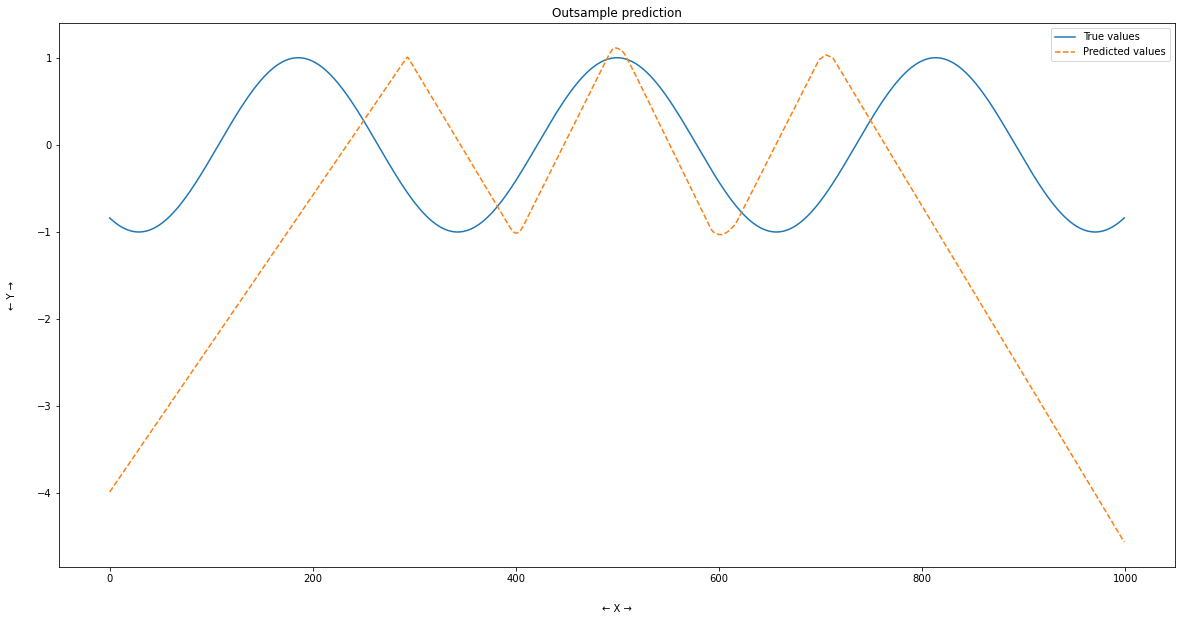

In [14]:
unseen_data = np.linspace(-15, 15, 1000)
NN_preds_outSample = NN.predict(unseen_data[:, np.newaxis])
plot_and_compare(NN_preds_outSample, "Outsample prediction")

Bro! No comments.

> ### Hence, **NO** for Neural Networks ❌

##### 

#### `5.` Are you kidding? Linear Regression?

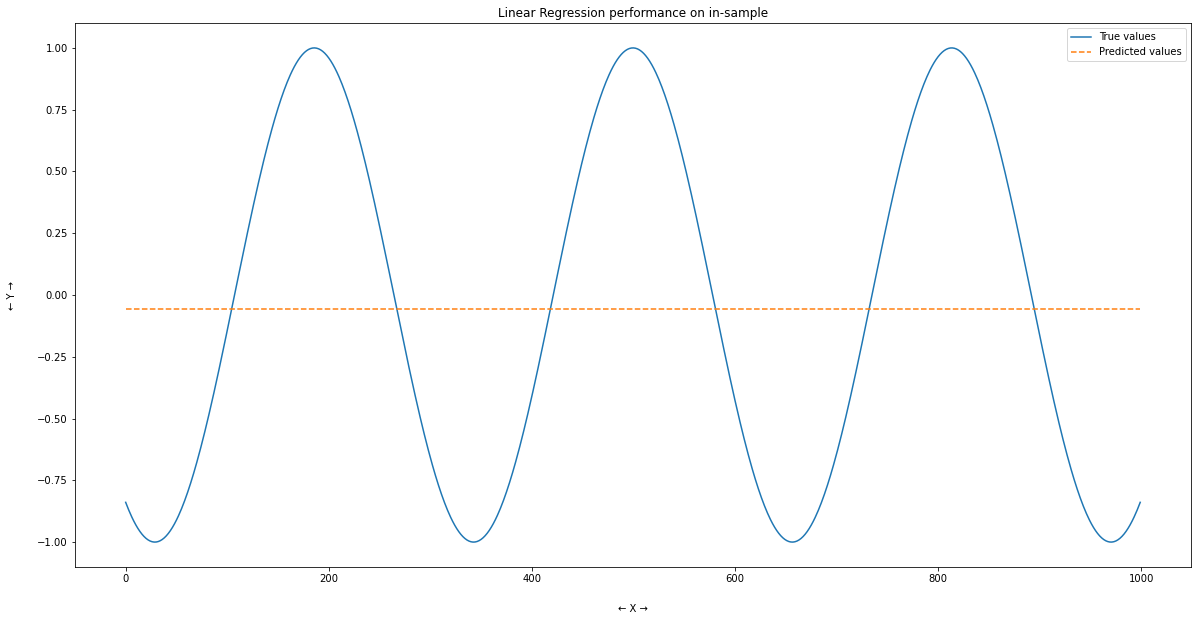

In [15]:
lr = LinearRegression().fit(X[:, np.newaxis], y)
lr_preds_inSample = lr.predict(X[:, np.newaxis])
plot_and_compare(lr_preds_inSample, "Linear Regression performance on in-sample")

# 😅

> ### Without checking test, **NO** for Linear Regression. ❌

##### 

#### `5.5` But we can improve... polynomial features!

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly = PolynomialFeatures(degree=10)
X3 = poly.fit_transform(X[:, np.newaxis])

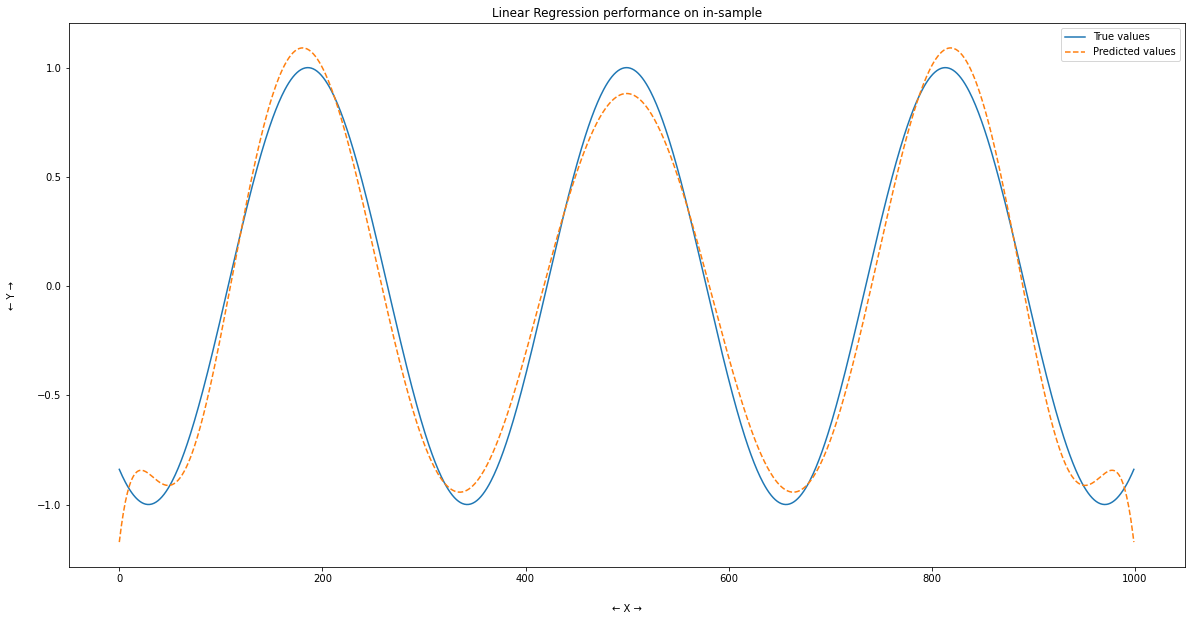

In [18]:
lr = LinearRegression().fit(X3, y)
lr_preds_inSample = lr.predict(X3)
plot_and_compare(lr_preds_inSample, "Linear Regression performance on in-sample")

Amazing. Of-course the overfitting. <br>
So, how does it perform on the **unseen data**?

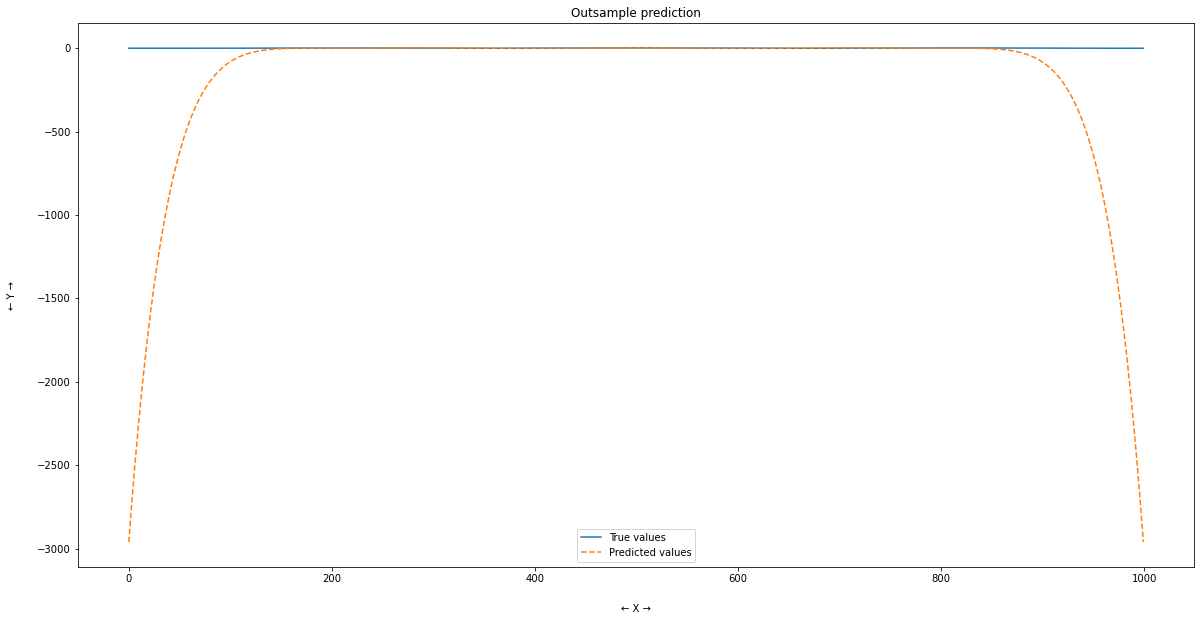

In [19]:
unseen_data = np.linspace(-15, 15, 1000)
unseen_data_X3 = poly.transform(unseen_data[:, np.newaxis])
lr_preds_outSample = lr.predict(unseen_data_X3)
plot_and_compare(lr_preds_outSample, "Outsample prediction")

Obviously... not the pattern that we are looking for.

# 

# 🧦 Enough, let's now talk stocks
*I know, not socks, but stocks.*

This time, we will take the data from the csv file instead of the real data in RELIANCE. It takes a lot of code to get them... and I think, I should avoid the unnecessary clutter. Let's stick to the ready data.

In [20]:
stocks = pd.read_csv("../data/sp500_close.csv", index_col=0, parse_dates=True)
GOOGL = stocks["GOOGL"].dropna()

In [21]:
GOOGL.head()

2013-02-08    393.0777
2013-02-11    391.6012
2013-02-12    390.7403
2013-02-13    391.8214
2013-02-14    394.3039
Name: GOOGL, dtype: float64

In [22]:
# training and testing split
train_idx = GOOGL.iloc[:1000].index
test_idx = GOOGL.iloc[1000:].index

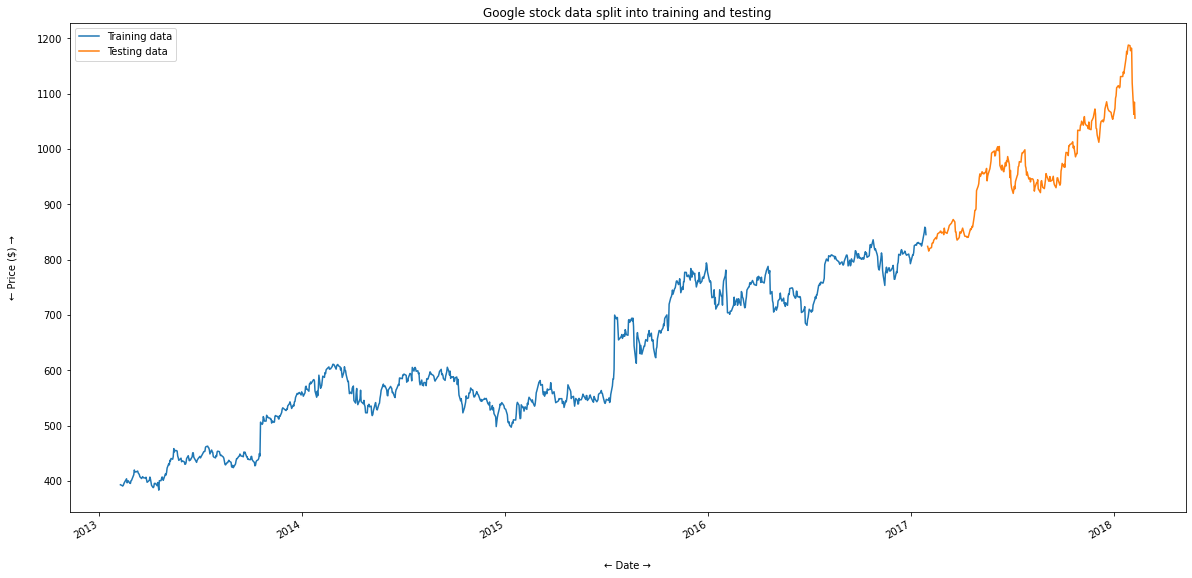

In [23]:
GOOGL[train_idx].plot(label="Training data")
GOOGL[test_idx].plot(label="Testing data")

plt.title("Google stock data split into training and testing")
plt.xlabel("← Date →", labelpad=20)
plt.ylabel("← Price ($) →", labelpad=20)
plt.legend();

This **clearly** is the problem of the extrapolation and the ML methods that we have seen are not able to go the pretty good job in this area.
<br>—<br>
Now, let's make the data as a **supervised learning** data.

In [24]:
## FOR TRAINING DATA ##
# our old method
lag = 2
Xtrain = []
ytrain = []

# storing as a numpy array for easy indexing
train_data = GOOGL[train_idx].values

for offset in range(0, len(train_data) - lag):
    Xtrain.append(train_data[offset : offset + lag])
    ytrain.append(train_data[offset + lag])

Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)

In [25]:
## FOR TEST DATA ##
# our old method
lag = 2
Xtest = []
ytest = []

# storing as a numpy array for easy indexing
test_data = GOOGL[test_idx].values

for offset in range(0, len(test_idx) - lag):
    Xtest.append(test_data[offset : offset + lag])
    ytest.append(test_data[offset + lag])

Xtest = np.array(Xtest)
ytest = np.array(ytest)

#### I know!!
In the test data **we have taken the real data** which will not be the case in real-life and the accuracy will be wrong. We will get higher accuracy in the test data and the **error propogation** will not be there.

I have done this delibrately so to show the **graph**.

> The stff done above simply means that the stock value depends on past `2` terms. Hence it is the AR(2) model. And taken 2 only because we can make a **2D plot** to show you something new.

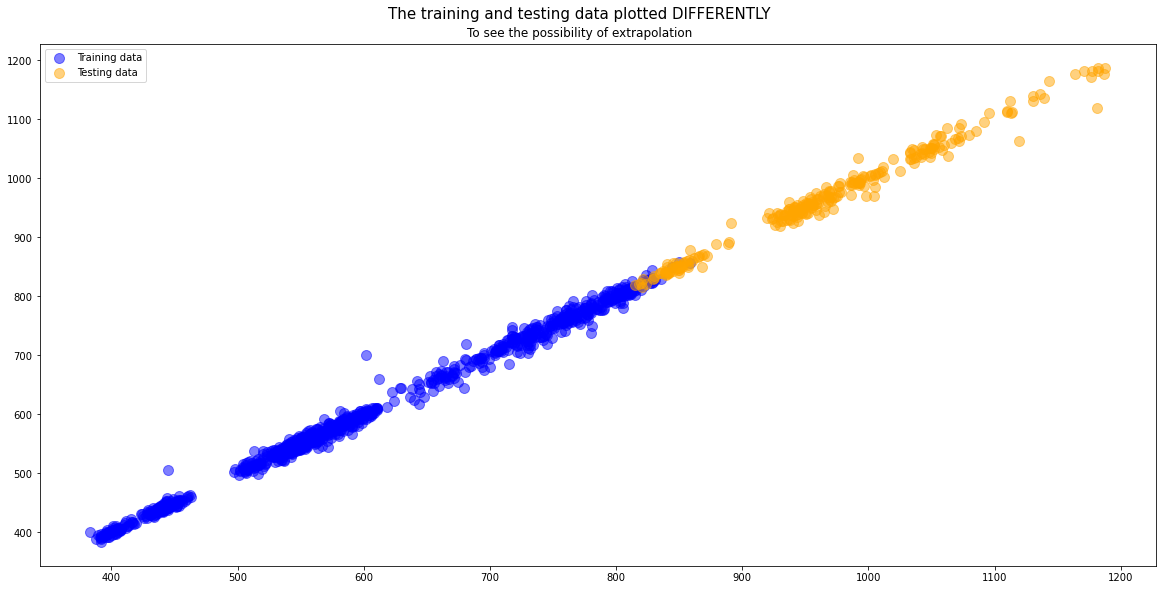

In [26]:
# the graph
plt.scatter(
    Xtrain[:, 0], Xtrain[:, 1], color="blue", label="Training data", alpha=0.5, s=100
)

plt.scatter(
    Xtest[:, 0], Xtest[:, 1], color="orange", label="Testing data", alpha=0.5, s=100
)

plt.figtext(
    0.5,
    0.885,
    "The training and testing data plotted DIFFERENTLY",
    fontsize=15,
    ha="center",
)
plt.figtext(
    0.5, 0.86, "To see the possibility of extrapolation", fontsize=12, ha="center"
)

plt.subplots_adjust(top=0.85)
plt.legend();

What do we **see**?
- The train data and the test data occupy different space in the graph.
- Meaning, the stock **isn't staying in the same range**.
- If we traing the model on the training data, it will only be able to learn the limited points in that limited range.
- So, to perform on the new data, it will have to extrapolate.

**If** the test data were **in the same range** as in the training...
- Then there is no need to extrapolate.
- Means the given ML models will perform good.

# 

# Great talk!
This was an amazing talk on the extrapolation. We have seen another face of the ML model! Let's see how do we apply them in the time-series setting in the upcoming notebooks.